# Building a Neural Network for Image Classification

### Objective

The aim of this project is to build and train a neural network for image classification using the CIFAR-10 dataset. The goal is to classify images into one of the 10 categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). Specifically, the objective is to achieve an accuracy of at least 80% on the test dataset.

### Step 1: Data Loading and Preparation

* Load the CIFAR 10 dataset using Keras
* Preprocess the images by normalizing the pixel values.

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load the data
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

In [3]:
# Normalize the data
training_images, testing_images = training_images/255, testing_images/255

### Step 2: Build the Neural Network

* Define the neural network architecture using Keras. The network should
include convolutional layers followed by fully connected layers
* Compile the model with an appropriate optimizer and loss function for multi
class classification

In [4]:
# Define the model
model = Sequential()

# Build the Neural Network
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None


### Step 3: Train the Model

* Train the model on the training data. Make sure to use validation data to monitor the model's performance and prevent overfitting.

In [7]:
# Train the model
history = model.fit(training_images, training_labels, epochs=5, validation_data=(testing_images, testing_labels))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7970 - loss: 0.5701 - val_accuracy: 0.7043 - val_loss: 0.9002
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8078 - loss: 0.5442 - val_accuracy: 0.7063 - val_loss: 0.9208
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8205 - loss: 0.5059 - val_accuracy: 0.7103 - val_loss: 0.9464
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8319 - loss: 0.4794 - val_accuracy: 0.7077 - val_loss: 0.9385
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8403 - loss: 0.4562 - val_accuracy: 0.7013 - val_loss: 0.9520


### Step 4: Evaluate the Model

* Evaluate the model on the test data using accuracy as the metric. Ensure your model achieves an accuracy of at least 80%.
* Plot the training and validation accuracy and loss.

In [8]:
# Evaluate the model
training_loss, training_acc = model.evaluate(training_images, training_labels)
print(f'Test Accuracy: {training_acc:.4f}')

testing_loss, testing_acc = model.evaluate(testing_images, testing_labels)
print(f'Test Accuracy: {testing_acc:.4f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8529 - loss: 0.4218
Test Accuracy: 0.8523
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7054 - loss: 0.9326
Test Accuracy: 0.7013


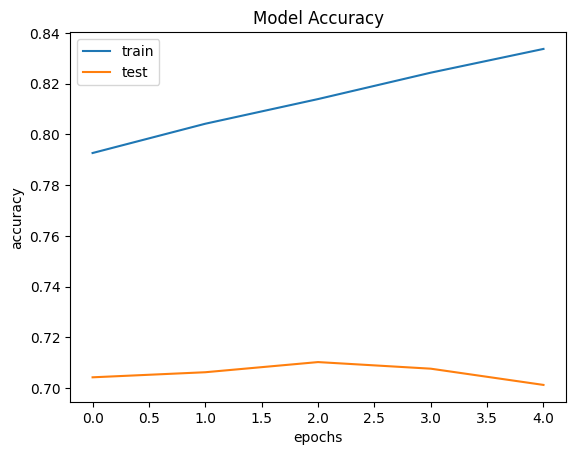

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

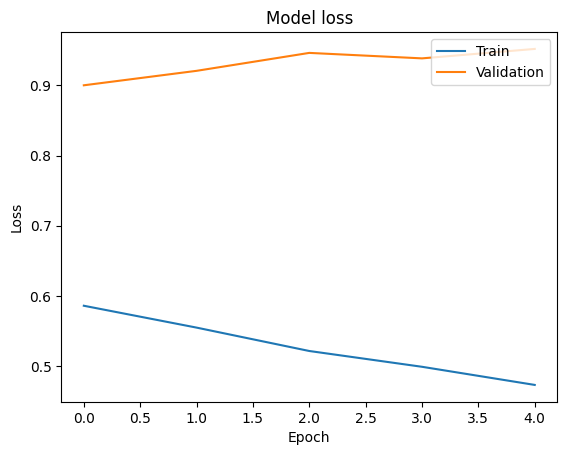

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Step 5: Make Predictions

* Use the trained model to make predictions on new images.
* Analyze the predictions and the corresponding probabilities.

In [11]:
# Make predictions
model.predict(testing_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.24442969e-02, 1.07042422e-03, 3.82948704e-02, ...,
        1.39204517e-03, 4.78876056e-03, 8.11429811e-04],
       [6.03328533e-02, 2.01995611e-01, 4.67726204e-06, ...,
        4.47095800e-07, 7.36738682e-01, 9.25001747e-04],
       [4.18207914e-01, 1.44695252e-01, 6.92777988e-03, ...,
        7.51000363e-04, 4.19965774e-01, 7.71154091e-03],
       ...,
       [2.37599870e-05, 2.81117609e-05, 1.22523464e-01, ...,
        6.15762435e-02, 1.30386013e-06, 4.21460172e-05],
       [1.85265783e-02, 4.42718389e-03, 1.09933701e-03, ...,
        7.37337919e-04, 7.17977586e-04, 3.24690528e-03],
       [4.82447249e-10, 1.77096844e-15, 8.57292293e-10, ...,
        9.99905467e-01, 8.58238285e-13, 9.33364280e-13]], dtype=float32)

### Step 6: Performance Analysis and Interpretation

* Add a section where you analyze the model's performance and interpret the results. Discuss any potential issues such as overfitting or class imbalance. Reflect on the effectiveness of your model and suggest any possible improvements.